# 6.4

In [1]:
import numpy as np

# 需要设置的参数
xk = np.array([10])			    # 初始点
eta = 0.1 					    # 学习率
epochs = 5000 				    # 迭代上限
epsilon = 0.0000001				# 梯度模长的上限

# 抛物线函数
def f(x):
	return x[0]*x[0]

# 抛物线函数的梯度
def df(x):
	return 2*x

# 梯度下降法
for i in range(epochs):
	dfxk = df(xk)
	if np.linalg.norm(dfxk) < epsilon:
		print('经过 {} 次迭代，梯度下降法运行完毕'.format(i+1))
		print('结果为 xk = {} ，f(xk) = {}'.format(xk, f(xk)))
		break
	xk = xk-eta*dfxk

经过 87 次迭代，梯度下降法运行完毕
结果为 xk = [4.63168357e-08] ，f(xk) = 2.145249268790818e-15


In [2]:
import numpy as np

xk = np.array([10])
eta = 0.1
epochs = 5000
epsilon = 0.0000001

def f(x):
    return x[0]*x[0]
def df(x):
    return 2*x

for i in range(epochs):
    dfxk = df(xk)
    if np.linalg.norm(dfxk) < epsilon:
        print(xk,f(xk),i)
        break
    xk = xk - eta*dfxk

[4.63168357e-08] 2.145249268790818e-15 86


# 6.4

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_31388/1920020475.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)


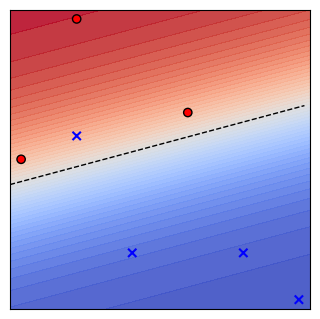

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 5000 				    # 迭代上限
epsilon = 0.01					# 梯度模长的上限

# 信用卡发放数据集
X = np.insert(np.array([[5,2], [3,2], [2,7], [1,4], [6,1], [4,5], [2,4.5]]), 0, 1, axis=1)	# 给每个xi第一列增加1
y = np.array([-1, -1, 1, 1, -1, 1, -1])

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数的梯度
def drhd(w):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 梯度下降法
for i in range(epochs):
	drhdwk = drhd(wk)
	if np.linalg.norm(drhdwk) < epsilon:
		break
	wk = wk-eta*drhdwk

# 下面是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 设置subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.25, right=0.75, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])

x1_min, x1_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
x2_min, x2_max = X[:, 2].min() - 0.2, X[:, 2].max() + 0.2
ax.set_xlim(x1_min, x1_max),ax.set_ylim(x2_min, x2_max)

# 绘制决策区域
resolution = 0.03
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
xx = np.insert(np.c_[xx1.ravel(), xx2.ravel()], 0, 1, axis=1)
Z = h(xx).reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, 50, cmap="coolwarm", vmin=0, vmax=1, alpha=0.9)

# 绘制数据集
markers = ('x', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 1], y=X[y==cl, 2], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='k', marker = m)

# 绘制直线
def lh(x):
	return -wk[0]/wk[2]-wk[1]/wk[2]*x
xx1 = np.arange(x1_min, x1_max, 0.1)
ax.plot(xx1, lh(xx1), 'k--', lw=1)

plt.show()

# 6.5

In [4]:
import numpy as np
from sklearn import datasets
import datetime

# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 10000000 				# 迭代上限
epsilon = 0.0005				# 梯度模长的上限

# 鸢尾花数据集
sampleNumber = 100
iris = datasets.load_iris()
X = np.insert(iris.data[50:50+sampleNumber, [2,3]], 0, 1, axis=1)	# 取其中两种鸢尾花的最后两个特征，并给每行的第一列增加 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)			# 两种类别分别用标签 -1 和 1 来表示

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数
def rhd(w):
	return np.mean(np.log(1+np.exp(-y*(X@w))))

# 经验误差函数的梯度
def drhd(w):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 梯度下降法
starttime = datetime.datetime.now()
for i in range(epochs):
	drhdwk = drhd(wk)
	if np.linalg.norm(drhdwk) < epsilon:
		endtime = datetime.datetime.now()
		print('迭代 {} 次后停止，||∇Rhd|| = {}，耗时约 {} 。'.format(i, np.linalg.norm(drhdwk), endtime-starttime))
		break
	wk = wk-eta*drhdwk

迭代 156192 次后停止，||∇Rhd|| = 0.0004999985803737898，耗时约 0:00:09.090589 。


In [5]:
import numpy as np
from sklearn import datasets
import datetime, math

# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 156192 				# 迭代上限

# 鸢尾花数据集
sampleNumber = 100
iris = datasets.load_iris()
X = np.insert(iris.data[50:50+sampleNumber, [2,3]], 0, 1, axis=1)	# 取其中两种鸢尾花的最后两个特征，并给每行的第一列增加 1
y = np.where(iris.target[50:50+sampleNumber] == 1, -1, 1)			# 两种类别分别用标签 -1 和 1 来表示

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数
def rhd(w):
	return np.mean(np.log(1+np.exp(-y*(X@w))))

# 经验误差函数的梯度
def drhd(w):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 经验误差函数的随机梯度
def srhd(w):
	# 从 X 和 y 中随机挑出一个点
	ran = np.random.randint(sampleNumber)
	xi, yi = X[ran], y[ran]
	# 对这个点求经验误差函数的梯度，没有直接用 drhd 函数是因为用矩阵速度太慢
	return -yi*xi*math.exp(-yi*np.dot(w, xi))/(1+math.exp(-yi*np.dot(w, xi)))

# 随机梯度下降法
starttime = datetime.datetime.now()
for _ in range(epochs):
	srhdwk = srhd(wk)
	wk = wk-eta*srhdwk

endtime = datetime.datetime.now()
print('迭代 {} 次后停止，||∇Rhd|| = {}，耗时约 {} 。'.format(epochs, np.linalg.norm(drhd(wk)), endtime-starttime))

迭代 156192 次后停止，||∇Rhd|| = 0.3019153711146336，耗时约 0:00:01.885231 。


# 6.6

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# 需要设置的参数
wk = np.array([0, 0, 0])		# 初始点
eta = 0.1					    # 学习率
epochs = 5000 				    # 迭代上限
epsilon = 0.01					# 梯度模长的上限

# 数据集
X = np.insert(np.array([[-1.8, 0.6], [0.48, -1.36], [1.44, 0.52], [3.42, 3.5], [3.68, -3.64], [-4.18, 1.68], ]), 0, 1, axis=1)	# 给每个xi第一列增加1
Z = X**2	# 特征转换
y = np.array([1, 1, 1, -1, -1, -1, ])

# sigmoid 函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 逻辑回归的假设函数
def h(x):
	return sigmoid(x@wk.T)

# 经验误差函数的梯度
def drhd(w, X, y):
	ew0 = np.mean(-y*X[:, 0]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew1 = np.mean(-y*X[:, 1]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	ew2 = np.mean(-y*X[:, 2]*np.exp(-y*(X@w))/(1+np.exp(-y*(X@w))))
	return np.array([ew0, ew1, ew2])

# 梯度下降法
for i in range(epochs):
	drhdwk = drhd(wk, Z, y)
	if np.linalg.norm(drhdwk) < epsilon:
		break
	wk = wk-eta*drhdwk

print('w0 = {}, w1 = {}, w_2 ={}'.format(wk[0], wk[1], wk[2]))

w0 = 5.094616323069294, w1 = -0.4970865014470162, w_2 =-0.4538308685115817


/Users/jiahuasong/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


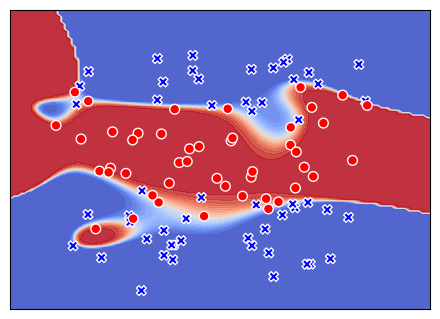

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(666)

xy_min, xy_max = -2, 2

# 生成数据集
X, y = np.array([]).reshape(-1,2), np.array([])
for _ in range(100):
	x1, x2 = np.random.uniform(xy_min,xy_max), np.random.uniform(xy_min,xy_max)
	X = np.append(X, [[np.random.normal(x1, 0.4), np.random.normal(x2, 0.4)]], axis=0)
	y = np.append(y, [-1 if (x2 < -1 or x2 > 1) else 1])

# 构造 8 次多项式的逻辑回归，并进行学习
clf = Pipeline([
        ('poly', PolynomialFeatures(degree=8)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=1e5)) # 逻辑回归
    ]).fit(X,y)

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 创建并排的两个subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])
ax.set_xlim(xy_min-1, xy_max+1),ax.set_ylim(xy_min-1, xy_max+1)

# 绘制决策区域
resolution = 0.05
xx1, xx2 = np.mgrid[xy_min-1:xy_max+1.1:resolution, xy_min-1:xy_max+1.1:resolution]
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)
contour = ax.contourf(xx1, xx2, probs, 25, cmap="coolwarm", vmin=0, vmax=1, alpha=0.9)

# 绘制数据集
markers = ('X', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='w', marker = m, s=7**2)

plt.show()

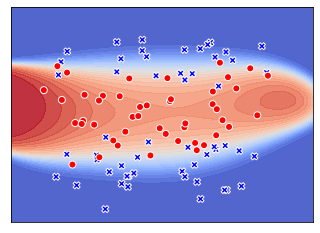

In [34]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(666)

xy_min, xy_max = -2, 2

# 生成数据集
X, y = np.array([]).reshape(-1,2), np.array([])
for _ in range(100):
	x1, x2 = np.random.uniform(xy_min,xy_max), np.random.uniform(xy_min,xy_max)
	X = np.append(X, [[np.random.normal(x1, 0.4), np.random.normal(x2, 0.4)]], axis=0)
	y = np.append(y, [-1 if (x2 < -1 or x2 > 1) else 1])

# 构造 8 次多项式的逻辑回归，并进行学习，罚项就是在这里增加的
clf = Pipeline([
        ('poly', PolynomialFeatures(degree=8)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，C 越小代表罚项带来的惩罚越大
    ]).fit(X,y)

# 以下是绘制代码
# 设置字体大小
plt.rcParams.update({'font.size': 14})
# 创建并排的两个subfigure
fig, ax = plt.subplots(figsize = (6, 3))
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.001)
ax.set(xticks=[], yticks=[])
ax.set_xlim(xy_min-1, xy_max+1),ax.set_ylim(xy_min-1, xy_max+1)

# 绘制决策区域
resolution = 0.05
xx1, xx2 = np.mgrid[xy_min-1:xy_max+1.1:resolution, xy_min-1:xy_max+1.1:resolution]
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx1.shape)
contour = ax.contourf(xx1, xx2, probs, 25, cmap="coolwarm", vmin=0, vmax=1, alpha=0.9)

# 绘制数据集
markers = ('X', 'o')
vmin, vmax = min(y), max(y)
cm = ListedColormap(('blue', 'red'))
for cl, m in zip(np.unique(y), markers):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=y[y==cl], alpha=1, vmin = vmin, vmax = vmax, cmap=cm, edgecolors='w', marker = m, s=7**2)

plt.show()

# 6.7

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_5390/765063391.py:68: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m)


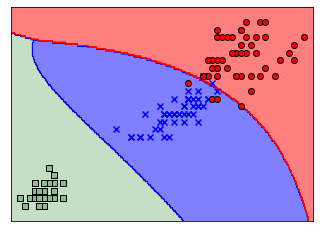

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[:, [2,3]]
y = iris.target[:]
# 运用 one-vs-rest 原则，得到三种二分类
y1 = np.where(y==0, 1, -1)
y2 = np.where(y==1, 1, -1)
y3 = np.where(y==2, 1, -1)

# 根据三种二分类的数据集，分别构造三个逻辑回归模型
clf1 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 6 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X,y1)
clf2 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 6 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X,y2)
clf3 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 6 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X,y3)

# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 找出数据的边界
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.005)
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlim(x1_min-0.2, x1_max+0.2),ax.set_ylim(x2_min-0.2, x2_max+0.2)

#绘制决策区域
cmap = ListedColormap(('darkseagreen', 'blue', 'red'))
resolution = 0.02
clfs = (clf1, clf2, clf3)
xx1, xx2 = np.mgrid[x1_min-0.2:x1_max+0.2:resolution, x2_min-0.2:x2_max+0.3:resolution]
grid = np.c_[xx1.ravel(), xx2.ravel()]
# 在三个逻辑回归模型上算出 one-vs-rest 的概率
probs = np.array([clf.predict_proba(grid)[:, 1] for clf in (clf1, clf2, clf3)])
# 选择其中概率最大的作为类别
Z = np.array([])
for i in range(probs.shape[1]):
	Z = np.append(Z, np.argmax([probs[0, i], probs[1, i], probs[2, i]]))
Z = Z.reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, 25, cmap=cmap, alpha=0.5)

# 绘制数据集
colors = ('darkseagreen', 'blue', 'red')
markers = ('s', 'x', 'o')
# 根据类别不同，绘制不同形状的点
for cl, m, color, in zip(np.unique(y), markers, colors, ):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m)

plt.show()

/var/folders/v2/5qft7fyx4md0d3vhbjvb64wr0000gn/T/ipykernel_5390/378773159.py:75: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m)


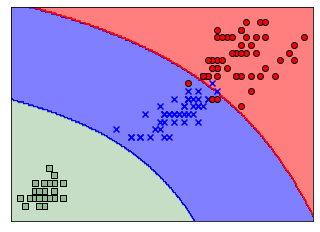

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model

# 以下是训练代码
# 载入iris数据集
iris = datasets.load_iris()
# 只取最后两个特征，以及取出对应的类别
X = iris.data[:, [2,3]]
y = iris.target

# 运用 one-vs-one 原则，得到三种二分类
X1 = X[:100]
y1 = y[:100]

X2 = X[np.r_[0:50,100:150]]
y2 = y[np.r_[0:50,100:150]]

X3 = X[50:]
y3 = y[50:]

# 构造 6 次多项式的逻辑回归，并进行学习
clf1 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X1,y1)
clf2 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X2,y2)
clf3 = Pipeline([
        ('poly', PolynomialFeatures(degree=6)),	# 8 次多项式的特征转换
        ('std_scale', StandardScaler()),
        ('log_reg', linear_model.LogisticRegression(C=0.2)) # 逻辑回归，并增加一些罚项
    ]).fit(X3,y3)

# 设置字体大小
plt.rcParams.update({'font.size': 12})
# 找出数据的边界
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
# 设置画布和坐标系
fig, ax = plt.subplots(figsize = (6, 3), nrows=1, ncols=1)
fig.subplots_adjust(left=0.15, right=0.85, top=0.999, bottom=0.005)
ax.set_xticks(()),ax.set_yticks(())
ax.set_xlim(x1_min-0.2, x1_max+0.2),ax.set_ylim(x2_min-0.2, x2_max+0.2)

#绘制决策区域
cmap = ListedColormap(('darkseagreen', 'blue', 'red'))
resolution = 0.02
clfs = (clf1, clf2, clf3)
xx1, xx2 = np.mgrid[x1_min-0.2:x1_max+0.2:resolution, x2_min-0.2:x2_max+0.3:resolution]
grid = np.c_[xx1.ravel(), xx2.ravel()]
# 在三个逻辑回归模型上算出 one-vs-rest 的概率
predicts = np.array([clf.predict(grid) for clf in (clf1, clf2, clf3)])
# 选择其中获胜的作为最后的类别
Z = np.array([])
for i in range(predicts.shape[1]):
	u, c = np.unique([predicts[0, i], predicts[1, i], predicts[2, i]], return_counts = True)
	Z = np.append(Z, u[c == c.max()])
Z = Z.reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, 25, cmap=cmap, alpha=0.5)

# 绘制数据集
colors = ('darkseagreen', 'blue', 'red')
markers = ('s', 'x', 'o')
# 根据类别不同，绘制不同形状的点
for cl, m, color, in zip(np.unique(y), markers, colors, ):
	ax.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=1, c=color, edgecolors='k', marker = m)

plt.show()